In [1]:
import matplotlib.pyplot as plt
import geopandas
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
import cartopy.crs as ccrs
import numpy as np

def scale_bar(ax, length=None, location=(0.5, 0.05), linewidth=3):
    """
    ax is the axes to draw the scalebar on.
    length is the length of the scalebar in km.
    location is center of the scalebar in axis coordinates.
    (ie. 0.5 is the middle of the plot)
    linewidth is the thickness of the scalebar.
    """
    #Get the limits of the axis in lat long
    llx0, llx1, lly0, lly1 = ax.get_extent(ccrs.PlateCarree())
    #Make tmc horizontally centred on the middle of the map,
    #vertically at scale bar location
    sbllx = (llx1 + llx0) / 2
    sblly = lly0 + (lly1 - lly0) * location[1]
    tmc = ccrs.TransverseMercator(sbllx, sblly)
    #Get the extent of the plotted area in coordinates in metres
    x0, x1, y0, y1 = ax.get_extent(tmc)
    #Turn the specified scalebar location into coordinates in metres
    sbx = x0 + (x1 - x0) * location[0]
    sby = y0 + (y1 - y0) * location[1]

    #Calculate a scale bar length if none has been given
    #(Theres probably a more pythonic way of rounding the number but this works)
    if not length: 
        length = (x1 - x0) / 5000 #in km
        ndim = int(np.floor(np.log10(length))) #number of digits in number
        length = round(length, -ndim) #round to 1sf
        #Returns numbers starting with the list
        def scale_number(x):
            if str(x)[0] in ['1', '2', '5']: return int(x)        
            else: return scale_number(x - 10 ** ndim)
        length = scale_number(length) 

    #Generate the x coordinate for the ends of the scalebar
    bar_xs = [sbx - length * 500, sbx + length * 500]
    #Plot the scalebar
    ax.plot(bar_xs, [sby, sby], transform=tmc, color='k', linewidth=linewidth)
    #Plot the scalebar label
    ax.text(sbx, sby, str(length) + ' km', transform=tmc,
            horizontalalignment='center', verticalalignment='bottom')

In [4]:
municipios = geopandas.read_file('municipios/Municipios_IBGE.shp')

In [5]:
lista_municipio = ['Caxias do Sul', 'Santa Maria', 'Porto Alegre', 'Pelotas']
def plot_municipios(municipios, lista_municipio, ax, c='black', delta=0.05):
    x = []
    y = []
    for index, row in municipios.iterrows():
        for m in lista_municipio:
            if row['NOME'] == m.upper():
                y.append(row['LATITUDESE'])
                x.append(row['LONGITUDES'])
    ax.scatter(x=x, y=y, marker='x', c=c)
    for i, txt in enumerate(lista_municipio[::-1]):
        ax.annotate(txt, (x[i]+delta, y[i]+delta), c=c)

In [6]:
calcario_caulim = pd.read_excel('LO_FEPAM/EMITIDOS 530 01 23102020_calcario e caulim.xls', sheet_name=0)
carvao_trufa_e_combustiveis_minerais = pd.read_excel('LO_FEPAM/EMITIDOS 530 02 23102020_carvao, turfa e combustiveis minerais.xls', sheet_name=0)
gemas = pd.read_excel('LO_FEPAM/EMITIDOS 530 04 23102020_gemas.xls', sheet_name=0)
ornamentais = pd.read_excel('LO_FEPAM/EMITIDOS 530 05 23102020_ornamentais.xls', sheet_name=0)
const_civil_brit = pd.read_excel('LO_FEPAM/EMITIDOS 530 06 23102020_construcao civil britados.xls', sheet_name=0)
const_civil_nbrit = pd.read_excel('LO_FEPAM/EMITIDOS 530 08 23102020_construcao civil nao britados.xls', sheet_name=0)
saibro = pd.read_excel('LO_FEPAM/EMITIDOS 530 10 23102020_saibro.xls', sheet_name=0)
argila = pd.read_excel('LO_FEPAM/EMITIDOS 530 11 23102020_argila.xls', sheet_name=0)
areia_hidrico = pd.read_excel('LO_FEPAM/EMITIDOS 530 12 23102020_areia em recurso hidrico.xls', sheet_name=0)
areia_n_hidrico = pd.read_excel('LO_FEPAM/EMITIDOS 530 13 23102020_areia fora de recurso hidrico.xls', sheet_name=0)
areia_ind = pd.read_excel('LO_FEPAM/EMITIDOS 530 14 23102020_areia industrial.xls', sheet_name=0)

In [7]:
dfs = {
'Calcário e caulim':calcario_caulim,
'Carvão, turfa e combustíveis minerais':carvao_trufa_e_combustiveis_minerais,
'Gemas':gemas,
'Ornamentais':ornamentais,
'Construção civil britados':const_civil_brit,
'Construção civil não britados':const_civil_nbrit,
'Saibro':saibro,
'Argila':argila,
'Areia em recurso hídrico':areia_hidrico,
'Areia fora de recurso hídrico':areia_n_hidrico,
'Areia industrial':areia_ind
}

In [8]:
grupos = {'Materiais para construção civil':['Calcário e caulim', 'Construção civil britados', 'Construção civil não britados', 'Saibro', 'Argila', 'Areia em recurso hídrico', 'Areia fora de recurso hídrico', 'Areia industrial'],
          'Insumos agrícolas': ['Calcário e caulim'],
          'Recursos energéticos': ['Carvão, turfa e combustíveis minerais'],
          'Minerais metálicos': [],
          'Indústria cerâmica': ['Argila', 'Calcário e caulim'],
          'Rochas ornamentais': ['Ornamentais'],
          'Pedras preciosas':['Gemas'],
          'Águas minerais': []
         }

Calcário e caulim
Construção civil britados
Construção civil não britados
Saibro
Argila
Areia em recurso hídrico
Areia fora de recurso hídrico
Areia industrial
Calcário e caulim
Carvão, turfa e combustíveis minerais


No handles with labels found to put in legend.


Argila
Calcário e caulim
Ornamentais
Gemas


No handles with labels found to put in legend.


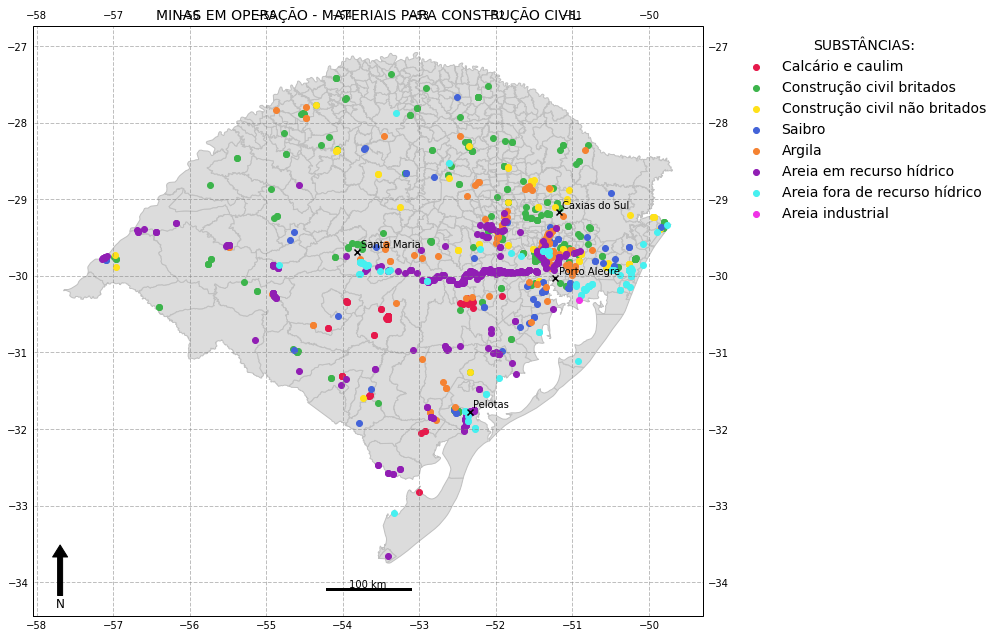

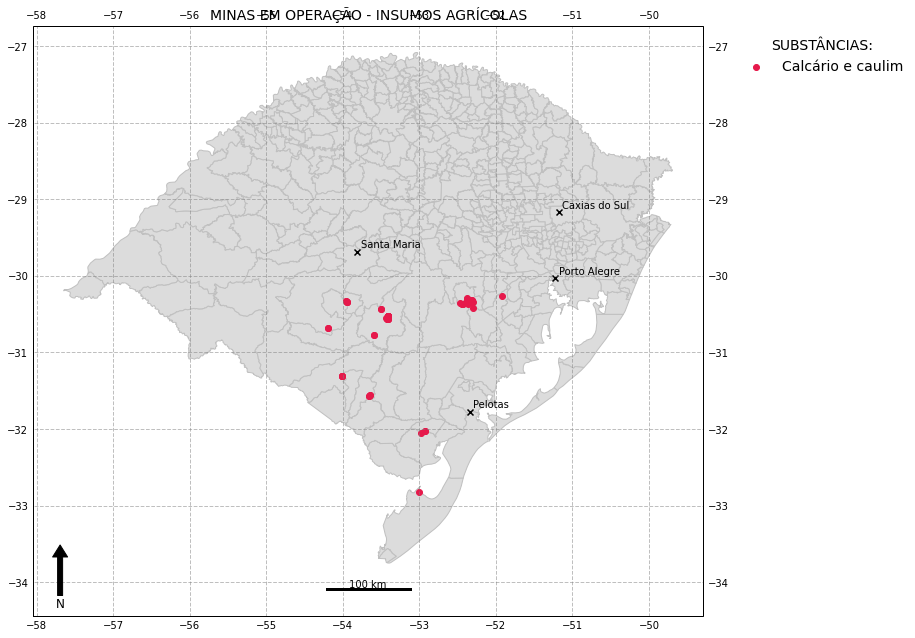

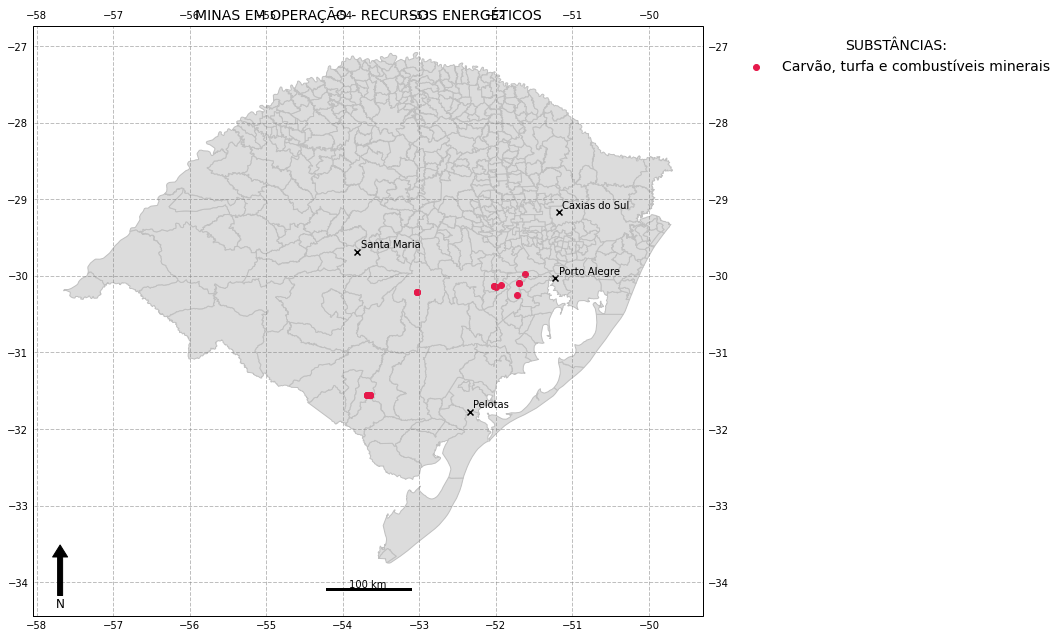

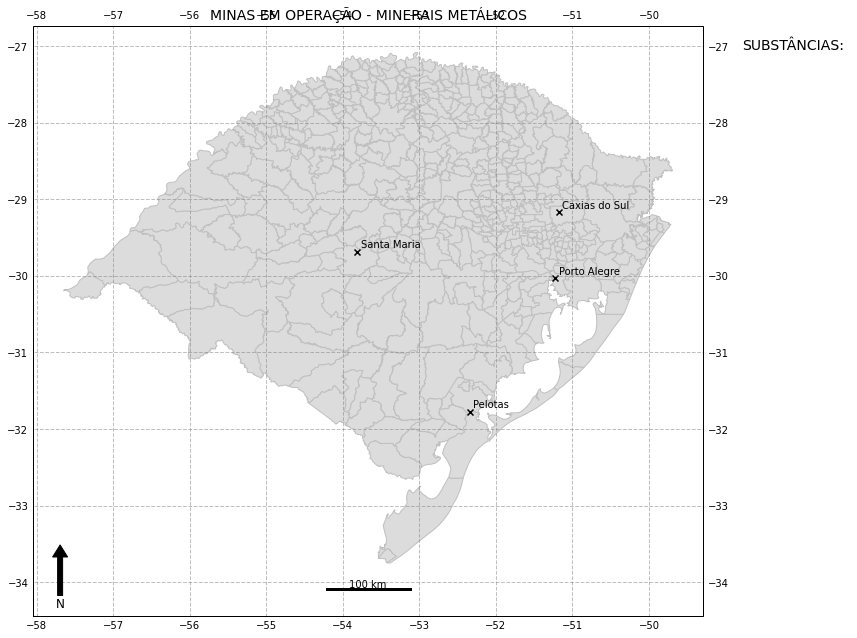

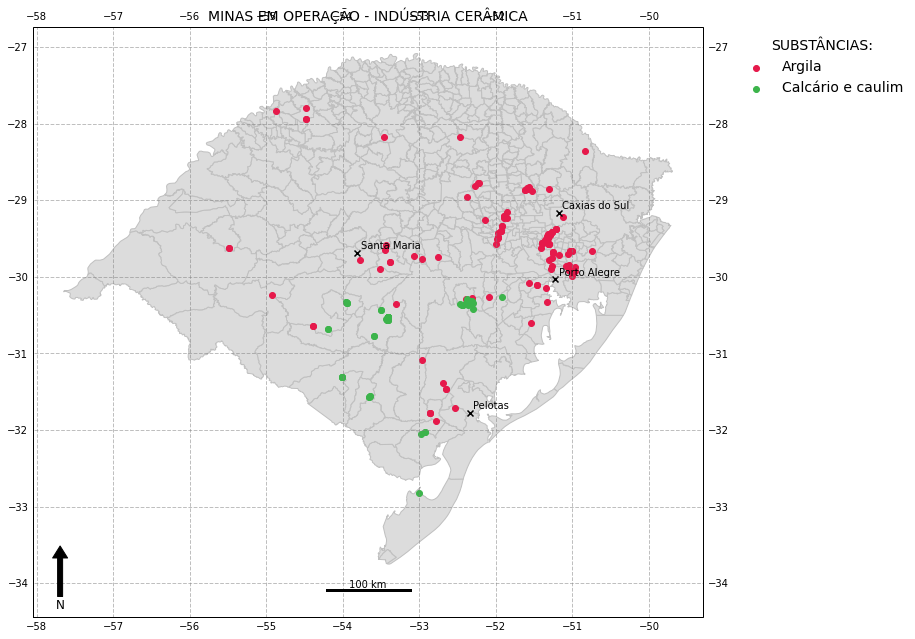

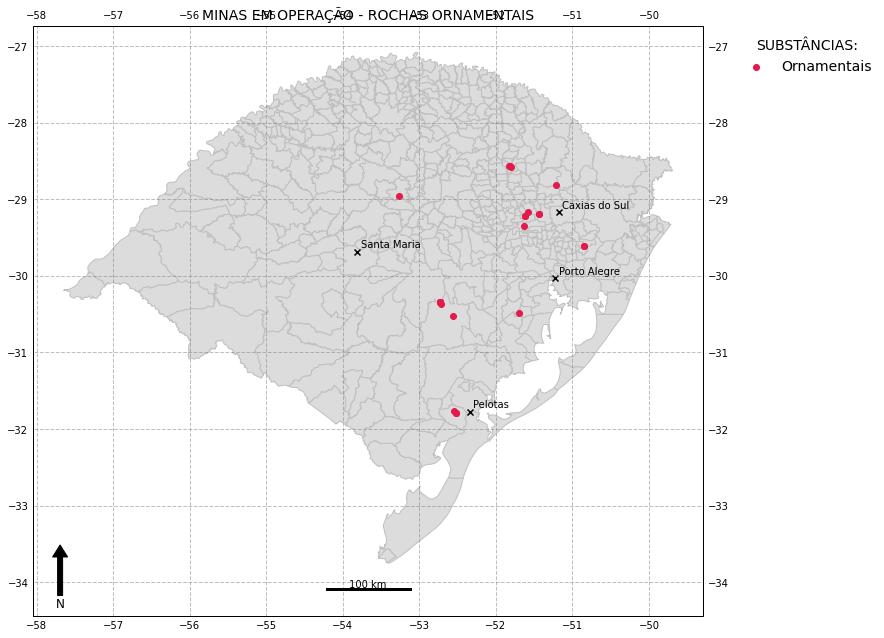

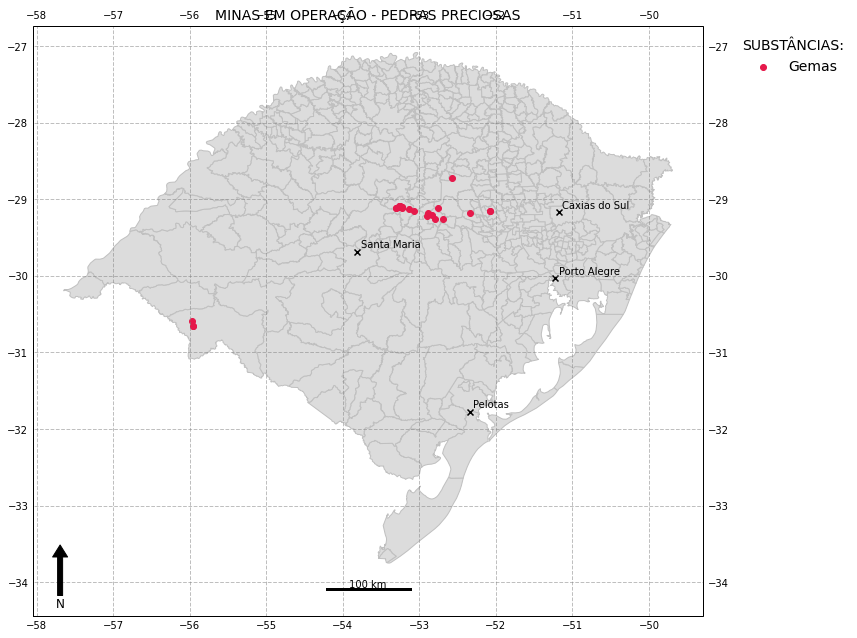

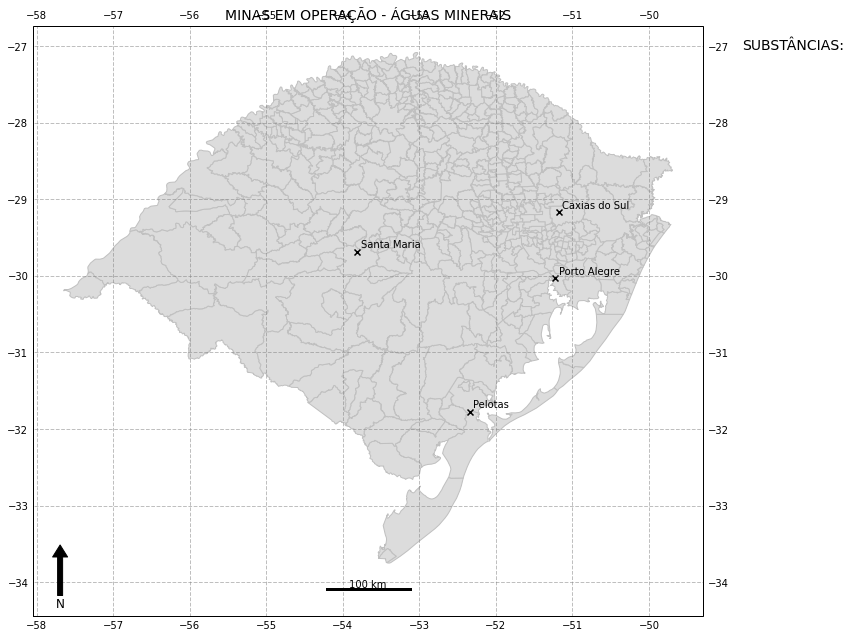

In [9]:
for grupo in grupos:
    fig, ax = plt.subplots(figsize=(12,12), subplot_kw={'projection': ccrs.PlateCarree()})
    municipios.plot(ax=ax, color='gainsboro', edgecolor='silver')

    gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=1, color='gray', alpha=0.5, linestyle='--')
    #gl.xlabels_top = False
    
    #colors
    #colormap = plt.cm.Set1
    #colors = [colormap(i) for i in np.linspace(0, 1., len(gp['SUBS'].unique()))]
    colors = sns.color_palette("Set1", 11)
    colors = ['#e6194b', '#3cb44b', '#ffe119', '#4363d8', '#f58231', '#911eb4', '#46f0f0', '#f032e6', '#bcf60c', '#fabebe', '#008080', '#e6beff', '#9a6324', '#fffac8', '#800000', '#aaffc3', '#808000', '#ffd8b1', '#000075', '#808080', '#ffffff', '#000000']    
    ax.set_prop_cycle('color', colors)
        
    for subs in grupos[grupo]:
        print(subs)
        ax.scatter(dfs[subs]['LONGITUDE'], dfs[subs]['LATITUDE'], label=subs)

    x, y, arrow_length = 0.04, 0.12, 0.1
    ax.annotate('N', xy=(x, y), xytext=(x, y-arrow_length),
    arrowprops=dict(facecolor='black', width=5, headwidth=15),
    ha='center', va='center', fontsize=12,
    xycoords=ax.transAxes)

    scale_bar(ax, 100, location=(0.5,0.01))
    
    plot_municipios(municipios, lista_municipio, ax, c='black', delta=0.05)

    ax.set_title('MINAS EM OPERAÇÃO - {}'.format(grupo.upper()), loc='center', fontsize='14')
    #fig.suptitle('Potencial - {}'.format(grupo), fontsize='14')
    plt.legend(bbox_to_anchor=(1.04, 1), edgecolor = 'white', fontsize='14', title='SUBSTÂNCIAS:', title_fontsize='14', loc='upper left')
    
    #nome = mineral.replace('/', '')
    plt.savefig('imagens/operacao_fepam/'+grupo+".png", bbox_inches='tight', facecolor='white', dpi = 300)
    #plt.show()